# Clustering using Zillow Data

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# general
import pandas as pd
import numpy as np

# explore/ stat
import scipy.stats as stats

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

# support modules
from env import host, user, password
import acquire
import summarize
import prepare
import explore

In [2]:
# acquire data, only retreive 261 > single residential family
df = acquire.get_zillow_data().set_index("parcelid")

In [3]:
# remove unit counts of two and three
df = df [(df.unitcnt != 2) | (df.unitcnt != 3)]

In [ ]:
df.head()

In [11]:
df.shape

(52168, 37)

In [ ]:
df.describe().T

In [ ]:
summarize.df_summary(df)

In [ ]:
summarize.nulls_by_col(df)

In [ ]:
summarize.nulls_by_row(df)

**This function deals with missing values in the columns and the rows. If a row has more than 50% nulls, they will be removed. If a columns has more than 75% nulls, they will be removed.**

In [4]:
df = prepare.handle_missing_values(df, prop_required_column = .5, prop_required_row = .75)

After using this function, we didn't lose any rows, but we lost a lot of columns.

In [32]:
df.shape

(27284, 38)

In [8]:
# summarize.report_remain_nulls_by_col(df, num_rows_of_interest)
summarize.report_remain_nulls_by_col(df, 200)

,num_rows_missing,pct_rows_missing
buildingqualitytypeid,18540,0.36
heatingorsystemtypeid,18344,0.35
heatingorsystemdesc,18344,0.35
lotsizesquarefeet,354,0.01
propertyzoningdesc,18478,0.35
regionidcity,1028,0.02
unitcnt,18450,0.35


In [5]:
df['age'] = 2017 - df.yearbuilt

In [9]:
# may want to drop these columns
# doesn't make sense to impute
df = df.drop(columns = ['yearbuilt','propertylandusedesc','propertylandusetypeid','fullbathcnt','state','calculatedbathnbr','id','finishedsquarefeet12', 'buildingqualitytypeid', 'heatingorsystemtypeid', 'heatingorsystemdesc', 'propertyzoningdesc', 'propertyzoningdesc', 'unitcnt'])
# now we can start impute and handle outlier

In [62]:
df.shape

In [11]:
df.columns

Index(['county', 'tax_rate', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'taxvaluedollarcnt',
       'structuretaxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'transactiondate', 'logerror',
       'transactions', 'age'],
      dtype='object')

In [14]:
col_impute_mean = ['tax_rate', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 
                   'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

col_impute_mode = ['regionidcity', 'regionidzip','censustractandblock']

In [6]:
train, test = prepare.split_my_data(df)

In [15]:
train, test = prepare.impute(train, test, "mean", col_impute_mean)
train, test = prepare.impute(train, test, "most_frequent", col_impute_mode)

In [ ]:
print(df.shape)
print(train.shape)
print(test.shape)

In [18]:
df = pd.concat([train,test])

In [ ]:
print(df.shape)
print(train.shape)
print(test.shape)

In [ ]:
# impute
# lotsizesquarefeet > mean/ median
# regionidcity > most freq

In [24]:
col_out = ["tax_rate", "bathroomcnt", "bedroomcnt","calculatedfinishedsquarefeet", "lotsizesquarefeet", "roomcnt", "taxamount"]

In [27]:
df = prepare.remove_outliers_iqr(df, col_out)

In [ ]:
print(df.shape)
print(train.shape)
print(test.shape)

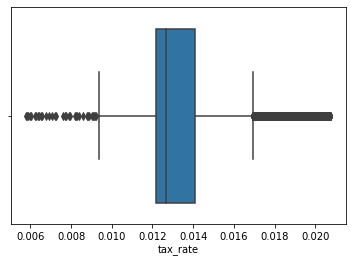

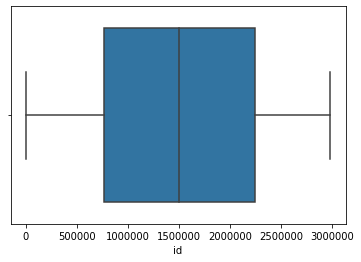

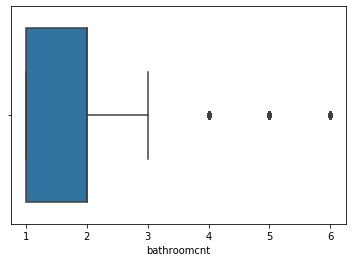

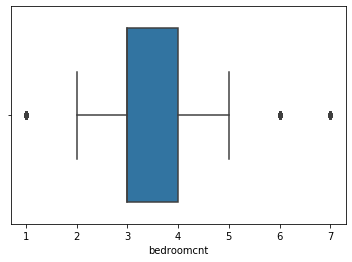

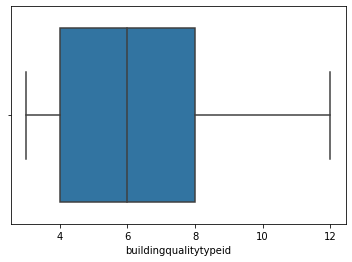

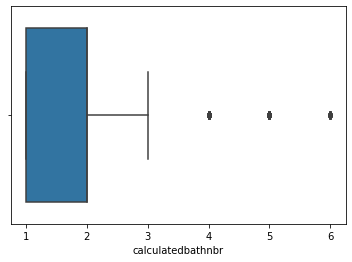

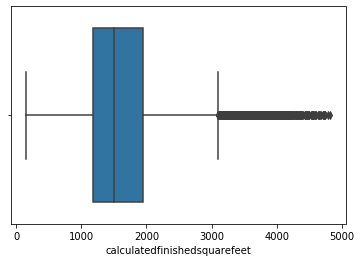

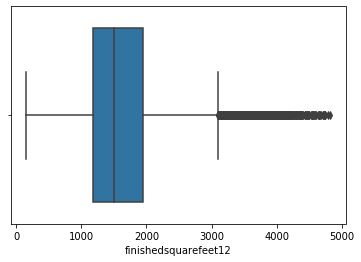

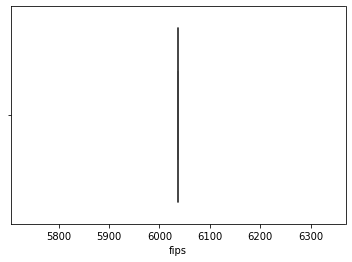

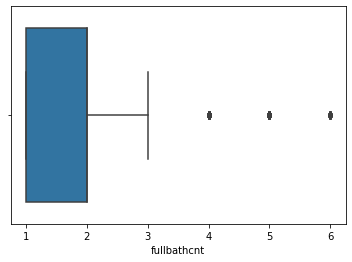

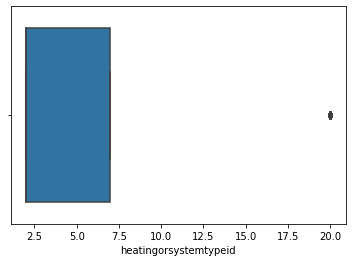

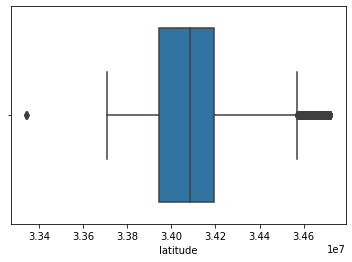

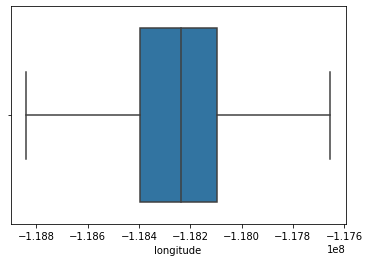

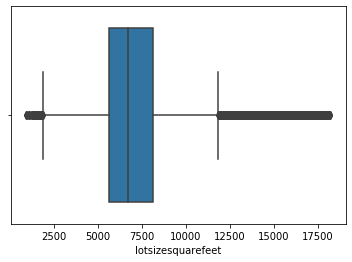

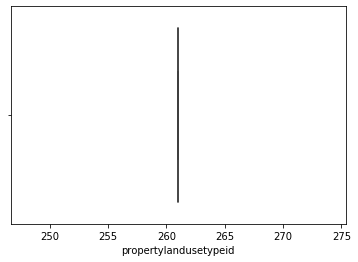

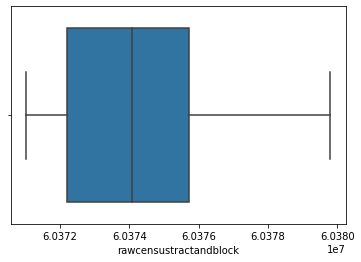

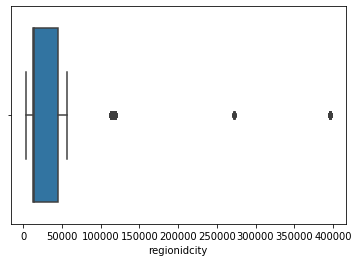

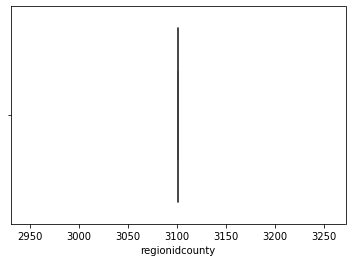

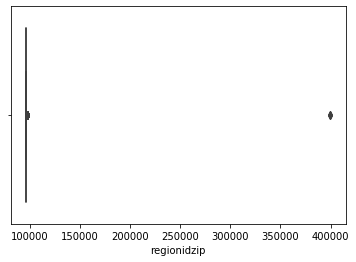

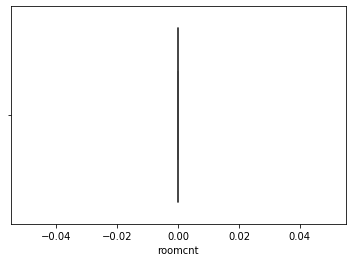

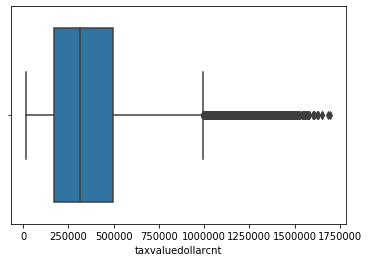

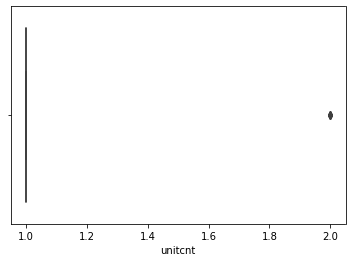

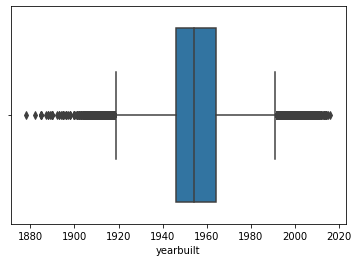

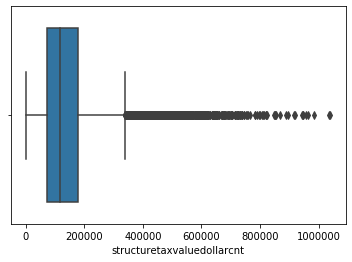

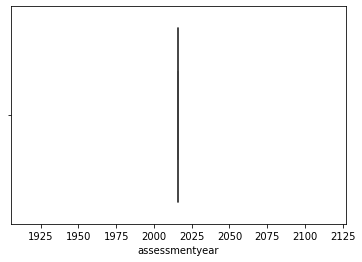

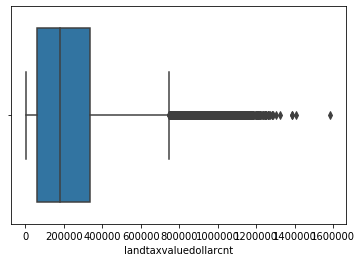

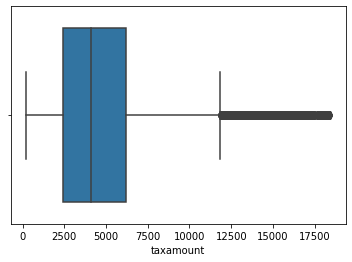

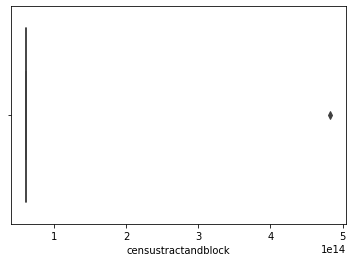

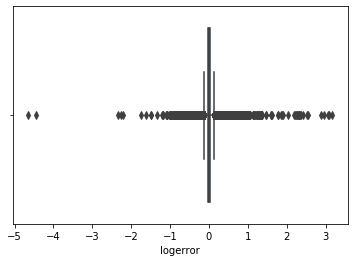

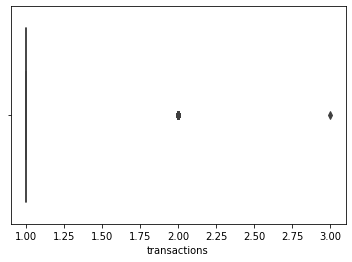

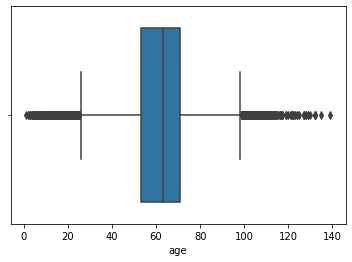

In [28]:
# visualize the columns with boxplot
# identify outliers visually
explore.df_feature_box(df)

In [29]:
df["transactions"] = df.transactions.astype("float")

df["bedroomcnt"] = df.bedroomcnt.astype("int")
df["roomcnt"] = df.roomcnt.astype("int")

df["fips"] = df.fips.astype("object")
df["regionidcity"] = df.regionidcity.astype("object")
df["regionidcounty"] = df.regionidcounty.astype("object")
df["regionidzip"] = df.regionidzip.astype("object")
df["assessmentyear"] = df.assessmentyear.astype("object")

In [30]:
print(df.shape)
print(train.shape)
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27284 entries, 11266660 to 12443183
Data columns (total 38 columns):
county                          27284 non-null object
tax_rate                        27284 non-null float64
id                              27284 non-null int64
bathroomcnt                     27284 non-null float64
bedroomcnt                      27284 non-null int64
buildingqualitytypeid           27284 non-null float64
calculatedbathnbr               27284 non-null float64
calculatedfinishedsquarefeet    27284 non-null float64
finishedsquarefeet12            27284 non-null float64
fips                            27284 non-null object
state                           27284 non-null object
fullbathcnt                     27284 non-null float64
heatingorsystemtypeid           27284 non-null float64
heatingorsystemdesc             27284 non-null object
latitude                        27284 non-null float64
longitude                       27284 non-null float64
lotsizesq

The 'heatingorsystemtypeid', 'heatingorsystemdesc' and 'propertyzoningdesc' have significantly less values than the other values, but not so much so that they were removed with the function. We will just take note of this if we need to reference that leter on.

In [ ]:
def df_feature_dist(df):
    # get a list of columns where content is number
    features_num = list(df.select_dtypes(np.number).columns)
    for feature in features_num:
        sns.distplot(df[feature].dropna())
        plt.show()

In [ ]:
df_feature_dist(df)